In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn.cluster import KMeans
from scipy.stats import skew
import warnings
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MeanShift
from pandas_profiling import ProfileReport


D:\ML\New folder\Env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Muhammad_Ramdhani\AppData\Local\Temp\ipykernel_11412\4077556781.py:14: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
data_diterima = pd.read_excel (' COVID 2020.xlsx')
data_diterima#tampilkan before

NOMOR            NAMA_PASIEN  UMUR JENIS_KELAMIN         Tangga_Lahir  \
0         1      ANDI SULANJANI ST  40.0             L                  NaN   
1         2  Dra. Hj. Neni Hernani  65.0             P                  NaN   
2         3        AI UUH MUHLASIH  35.0             P                  NaN   
3         4      Ardhi Ardhiansyah  40.0             L                  NaN   
4         5         Teddy Susianto  47.0             L                  NaN   
...     ...                    ...   ...           ...                  ...   
2143   2195               NURJANAH  54.0             P  1966-04-07 00:00:00   
2144   2196        NOVIA OKTAVIANI  23.0             P  1997-10-25 00:00:00   
2145   2197          YEYET SUHAETI  41.0             P  1979-01-28 00:00:00   
2146   2198     DEWI SITI PURWANTI  24.0             P           1996-08-26   
2147   2199           NOVA ALMAISA  33.0             P           1987-11-12   

                                                 ALAMAT     KELURAHAN  \
0     Jl. Taman Pahlawan RT 02 RW 01 Kel. Cikalang K...      CIKALANG   
1     Jl. Sukagalih No. 16 RT 03 RW 10 Kel. Lengkong...  LENGKONGSARI   
2     Gunung Siman RT 03 RW 06 Kel. Cigantang Kec. M...     CIGANTANG   
3     Jl. Tentara Pelajar No.74 Rt 04 Rw 08, Empangs...    EMPANGSARI   
4     Jl. RSUD No1 .RT 02 RW 012 , Empangsari, Tawan...    EMPANGSARI   
...                                                 ...           ...   
2143                      JL LASWI KEMUNING RT 01 RW 05     CIKALANG    
2144                      JL LASWI KEMUNING RT 01 RW 05     CIKALANG    
2145                           JL WINAJAYA 2 NO 25 2/10     KAHURIPAN   
2146                            KAPTEN HAJI DIDI EFENDI    EMPANGSARI   
2147                               JL. PGRI BARAT NO.14  LENGKONGSARI   

       KECAMATAN                 TEMPAT_RAWAT TANGGAL_REGISTRASI  \
0         TAWANG                      Rs. JK                 NaT   
1         TAWANG           Rs. JK (Pemulihan)                NaT   
2     MANGKUBUMI  Rs. JK (Rapid Test Positif)                NaT   
3         TAWANG             Rs. TMC (Sembuh)                NaT   
4         TAWANG                      Rs. TMC                NaT   
...          ...                          ...                ...   
2143      TAWANG                          NaN         2020-12-31   
2144      TAWANG                          NaN         2020-12-31   
2145     TAWANG                           NaN         2020-12-31   
2146      TAWANG                          NaN         2020-12-31   
2147      TAWANG                          NaN         2020-12-31   

     TANGGAL_POSITIF TANGGAL_SEMBUH TANGGAL_MENINGGAL         KETERANGAN  \
0         2020-03-24     2020-04-16               NaT                NaN   
1         2020-03-24     2020-04-16               NaT                NaN   
2         2020-03-25     2020-04-11               NaT                NaN   
3         2020-04-02     2020-06-01               NaT                NaN   
4         2020-04-02     2020-06-01               NaT                NaN   
...              ...            ...               ...                ...   
2143      2020-12-31     2021-01-14               NaT   KONTAK ERAT NOPI   
2144      2020-12-31     2021-01-14               NaT        NON CLUSTER   
2145      2020-12-31     2021-01-14               NaT  KONTAK ERAT RINI    
2146      2020-12-31     2021-01-14               NaT                NaN   
2147      2020-12-31     2021-01-14               NaT                NaN   

      simptomatik  Asimptomatik  
0             NaN           NaN  
1             NaN           NaN  
2             NaN           NaN  
3             NaN           NaN  
4             NaN           NaN  
...           ...           ...  
2143          1.0           NaN  
2144          1.0           NaN  
2145          1.0           NaN  
2146          1.0           NaN  
2147          NaN           1.0  

[2148 rows x 16 columns]

In [5]:
df = pd.read_excel ('__DATA_COVID_2020_v1B.xlsx')
df.head(20)

UMUR  JENIS_KELAMIN KELURAHAN TANGGAL_POSITIF TANGGAL_SEMBUH  simptomatik  \
0   52.0              0  ARGASARI      2020-08-18     2020-09-14        False   
1   68.0              1  ARGASARI      2020-08-18     2020-09-07        False   
2   17.0              0  ARGASARI      2020-10-11     2020-11-17        False   
3   56.0              0  ARGASARI      2020-10-15     2020-11-17        False   
4   50.0              0  ARGASARI      2020-10-26     2020-12-18        False   
5   49.0              0  ARGASARI      2020-11-12     2020-12-14        False   
6   74.0              1  ARGASARI      2020-11-25     2020-12-20        False   
7   53.0              1  ARGASARI      2020-11-28     2020-12-20         True   
8   40.0              0  ARGASARI      2020-12-02     2020-12-15         True   
9   18.0              1  ARGASARI      2020-12-03     2020-12-25        False   
10  43.0              1  ARGASARI      2020-12-04     2020-12-25        False   
11  26.0              0  ARGASARI      2020-12-04     2020-12-25        False   
12  32.0              1  ARGASARI      2020-12-08     2020-12-28        False   
13  56.0              1  ARGASARI      2020-12-09     2020-12-29        False   
14  42.0              0  ARGASARI      2020-12-10     2020-12-30        False   
15  19.0              0  ARGASARI      2020-12-10     2020-12-30        False   
16  61.0              0  ARGASARI      2020-12-10     2020-12-30         True   
17  78.0              1  ARGASARI      2020-12-10     2020-12-30         True   
18  30.0              0  ARGASARI      2020-12-10     2020-12-30         True   
19  62.0              0  ARGASARI      2020-12-13     2020-12-27         True   

    Asimptomatik  Kode Kelurahan  Latitude  Longitude  
0          False               0  -7326224  108200223  
1          False               0  -7326224  108200223  
2          False               0  -7326224  108200223  
3          False               0  -7326224  108200223  
4           True               0  -7326224  108200223  
5          False               0  -7326224  108200223  
6           True               0  -7326224  108200223  
7          False               0  -7326224  108200223  
8          False               0  -7326224  108200223  
9          False               0  -7326224  108200223  
10          True               0  -7326224  108200223  
11          True               0  -7326224  108200223  
12          True               0  -7326224  108200223  
13          True               0  -7326224  108200223  
14          True               0  -7326224  108200223  
15          True               0  -7326224  108200223  
16         False               0  -7326224  108200223  
17         False               0  -7326224  108200223  
18         False               0  -7326224  108200223  
19         False               0  -7326224  108200223

In [6]:
df.dropna()

UMUR  JENIS_KELAMIN   KELURAHAN TANGGAL_POSITIF TANGGAL_SEMBUH  \
0     52.0              0    ARGASARI      2020-08-18     2020-09-14   
1     68.0              1    ARGASARI      2020-08-18     2020-09-07   
2     17.0              0    ARGASARI      2020-10-11     2020-11-17   
3     56.0              0    ARGASARI      2020-10-15     2020-11-17   
4     50.0              0    ARGASARI      2020-10-26     2020-12-18   
...    ...            ...         ...             ...            ...   
2142  43.0              1  YUDANAGARA      2020-09-10     2020-10-06   
2143  30.0              1  YUDANAGARA      2020-11-25     2020-12-20   
2144  56.0              1  YUDANAGARA      2020-12-01     2020-12-24   
2145  30.0              0  YUDANAGARA      2020-12-03     2020-12-25   
2146  40.0              1  YUDANAGARA      2020-12-13     2020-12-27   

      simptomatik  Asimptomatik  Kode Kelurahan  Latitude  Longitude  
0           False         False               0  -7326224  108200223  
1           False         False               0  -7326224  108200223  
2           False         False               0  -7326224  108200223  
3           False         False               0  -7326224  108200223  
4           False          True               0  -7326224  108200223  
...           ...           ...             ...       ...        ...  
2142        False         False              23  -7332715  108212523  
2143         True         False              23  -7332715  108212523  
2144         True         False              23  -7332715  108212523  
2145        False         False              23  -7332715  108212523  
2146         True         False              23  -7332715  108212523  

[2147 rows x 10 columns]

In [7]:
df['simptomatik'].replace({True:1,False:0},inplace=True)
df['simptomatik'].map({True: 1, False: 0})  
df['Asimptomatik'].replace({True:1,False:0},inplace=True)
df

UMUR  JENIS_KELAMIN   KELURAHAN TANGGAL_POSITIF TANGGAL_SEMBUH  \
0     52.0              0    ARGASARI      2020-08-18     2020-09-14   
1     68.0              1    ARGASARI      2020-08-18     2020-09-07   
2     17.0              0    ARGASARI      2020-10-11     2020-11-17   
3     56.0              0    ARGASARI      2020-10-15     2020-11-17   
4     50.0              0    ARGASARI      2020-10-26     2020-12-18   
...    ...            ...         ...             ...            ...   
2142  43.0              1  YUDANAGARA      2020-09-10     2020-10-06   
2143  30.0              1  YUDANAGARA      2020-11-25     2020-12-20   
2144  56.0              1  YUDANAGARA      2020-12-01     2020-12-24   
2145  30.0              0  YUDANAGARA      2020-12-03     2020-12-25   
2146  40.0              1  YUDANAGARA      2020-12-13     2020-12-27   

      simptomatik  Asimptomatik  Kode Kelurahan  Latitude  Longitude  
0               0             0               0  -7326224  108200223  
1               0             0               0  -7326224  108200223  
2               0             0               0  -7326224  108200223  
3               0             0               0  -7326224  108200223  
4               0             1               0  -7326224  108200223  
...           ...           ...             ...       ...        ...  
2142            0             0              23  -7332715  108212523  
2143            1             0              23  -7332715  108212523  
2144            1             0              23  -7332715  108212523  
2145            0             0              23  -7332715  108212523  
2146            1             0              23  -7332715  108212523  

[2147 rows x 10 columns]

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UMUR             2147 non-null   float64       
 1   JENIS_KELAMIN    2147 non-null   int64         
 2   KELURAHAN        2147 non-null   object        
 3   TANGGAL_POSITIF  2147 non-null   datetime64[ns]
 4   TANGGAL_SEMBUH   2147 non-null   datetime64[ns]
 5   simptomatik      2147 non-null   int64         
 6   Asimptomatik     2147 non-null   int64         
 7   Kode Kelurahan   2147 non-null   int64         
 8   Latitude         2147 non-null   int64         
 9   Longitude        2147 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(1)
memory usage: 167.9+ KB


In [9]:
df['BULAN_POSITIF'] = pd.DatetimeIndex(df['TANGGAL_POSITIF']).month
df['TAHUN_POSITIF'] = pd.DatetimeIndex(df['TANGGAL_POSITIF']).year
df['BULAN_SEMBUH'] = pd.DatetimeIndex(df['TANGGAL_SEMBUH']).month
df['TAHUN_SEMBUH'] = pd.DatetimeIndex(df['TANGGAL_SEMBUH']).year
#df['BULAN_REGISTRASI'] = pd.DatetimeIndex(df['TANGGAL_REGISTRASI']).month
#df['TAHUN_REGISTRASI'] = pd.DatetimeIndex(df['TANGGAL_REGISTRASI']).year

In [10]:
df.fillna(0)

UMUR  JENIS_KELAMIN   KELURAHAN TANGGAL_POSITIF TANGGAL_SEMBUH  \
0     52.0              0    ARGASARI      2020-08-18     2020-09-14   
1     68.0              1    ARGASARI      2020-08-18     2020-09-07   
2     17.0              0    ARGASARI      2020-10-11     2020-11-17   
3     56.0              0    ARGASARI      2020-10-15     2020-11-17   
4     50.0              0    ARGASARI      2020-10-26     2020-12-18   
...    ...            ...         ...             ...            ...   
2142  43.0              1  YUDANAGARA      2020-09-10     2020-10-06   
2143  30.0              1  YUDANAGARA      2020-11-25     2020-12-20   
2144  56.0              1  YUDANAGARA      2020-12-01     2020-12-24   
2145  30.0              0  YUDANAGARA      2020-12-03     2020-12-25   
2146  40.0              1  YUDANAGARA      2020-12-13     2020-12-27   

      simptomatik  Asimptomatik  Kode Kelurahan  Latitude  Longitude  \
0               0             0               0  -7326224  108200223   
1               0             0               0  -7326224  108200223   
2               0             0               0  -7326224  108200223   
3               0             0               0  -7326224  108200223   
4               0             1               0  -7326224  108200223   
...           ...           ...             ...       ...        ...   
2142            0             0              23  -7332715  108212523   
2143            1             0              23  -7332715  108212523   
2144            1             0              23  -7332715  108212523   
2145            0             0              23  -7332715  108212523   
2146            1             0              23  -7332715  108212523   

      BULAN_POSITIF  TAHUN_POSITIF  BULAN_SEMBUH  TAHUN_SEMBUH  
0                 8           2020             9          2020  
1                 8           2020             9          2020  
2                10           2020            11          2020  
3                10           2020            11          2020  
4                10           2020            12          2020  
...             ...            ...           ...           ...  
2142              9           2020            10          2020  
2143             11           2020            12          2020  
2144             12           2020            12          2020  
2145             12           2020            12          2020  
2146             12           2020            12          2020  

[2147 rows x 14 columns]

In [11]:
df#tampilkan after

UMUR  JENIS_KELAMIN   KELURAHAN TANGGAL_POSITIF TANGGAL_SEMBUH  \
0     52.0              0    ARGASARI      2020-08-18     2020-09-14   
1     68.0              1    ARGASARI      2020-08-18     2020-09-07   
2     17.0              0    ARGASARI      2020-10-11     2020-11-17   
3     56.0              0    ARGASARI      2020-10-15     2020-11-17   
4     50.0              0    ARGASARI      2020-10-26     2020-12-18   
...    ...            ...         ...             ...            ...   
2142  43.0              1  YUDANAGARA      2020-09-10     2020-10-06   
2143  30.0              1  YUDANAGARA      2020-11-25     2020-12-20   
2144  56.0              1  YUDANAGARA      2020-12-01     2020-12-24   
2145  30.0              0  YUDANAGARA      2020-12-03     2020-12-25   
2146  40.0              1  YUDANAGARA      2020-12-13     2020-12-27   

      simptomatik  Asimptomatik  Kode Kelurahan  Latitude  Longitude  \
0               0             0               0  -7326224  108200223   
1               0             0               0  -7326224  108200223   
2               0             0               0  -7326224  108200223   
3               0             0               0  -7326224  108200223   
4               0             1               0  -7326224  108200223   
...           ...           ...             ...       ...        ...   
2142            0             0              23  -7332715  108212523   
2143            1             0              23  -7332715  108212523   
2144            1             0              23  -7332715  108212523   
2145            0             0              23  -7332715  108212523   
2146            1             0              23  -7332715  108212523   

      BULAN_POSITIF  TAHUN_POSITIF  BULAN_SEMBUH  TAHUN_SEMBUH  
0                 8           2020             9          2020  
1                 8           2020             9          2020  
2                10           2020            11          2020  
3                10           2020            11          2020  
4                10           2020            12          2020  
...             ...            ...           ...           ...  
2142              9           2020            10          2020  
2143             11           2020            12          2020  
2144             12           2020            12          2020  
2145             12           2020            12          2020  
2146             12           2020            12          2020  

[2147 rows x 14 columns]

In [12]:
df1=df.copy()

In [13]:
df1=df1.drop(['TANGGAL_POSITIF','TANGGAL_SEMBUH'], axis = 1)#hapus kolom

In [14]:
# df1["Latitude"] = (df1["Latitude"] - df1["Latitude"].min()) / (df1["Latitude"].max() - df1["Latitude"].min())
# df1["Longitude"] = (df1["Longitude"] - df1["Longitude"].min()) / (df1["Longitude"].max() - df1["Longitude"].min())

In [15]:
df1

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
2142  43.0              1  YUDANAGARA            0             0   
2143  30.0              1  YUDANAGARA            1             0   
2144  56.0              1  YUDANAGARA            1             0   
2145  30.0              0  YUDANAGARA            0             0   
2146  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  TAHUN_POSITIF  \
0                  0  -7326224  108200223              8           2020   
1                  0  -7326224  108200223              8           2020   
2                  0  -7326224  108200223             10           2020   
3                  0  -7326224  108200223             10           2020   
4                  0  -7326224  108200223             10           2020   
...              ...       ...        ...            ...            ...   
2142              23  -7332715  108212523              9           2020   
2143              23  -7332715  108212523             11           2020   
2144              23  -7332715  108212523             12           2020   
2145              23  -7332715  108212523             12           2020   
2146              23  -7332715  108212523             12           2020   

      BULAN_SEMBUH  TAHUN_SEMBUH  
0                9          2020  
1                9          2020  
2               11          2020  
3               11          2020  
4               12          2020  
...            ...           ...  
2142            10          2020  
2143            12          2020  
2144            12          2020  
2145            12          2020  
2146            12          2020  

[2147 rows x 12 columns]

C:\Users\Muhammad_Ramdhani\AppData\Local\Temp\ipykernel_11412\471573778.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, fmt='.2g');


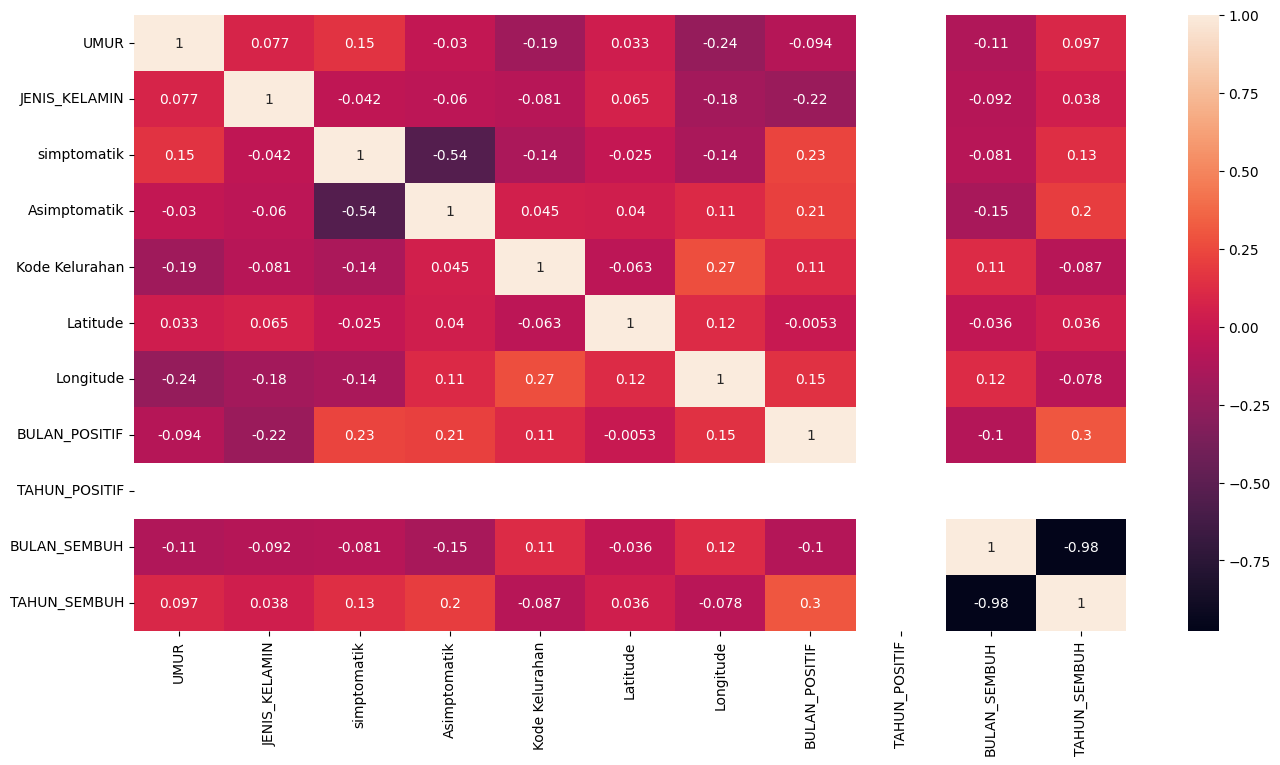

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df1.corr(), annot=True, fmt='.2g');

In [17]:
df1.describe()

UMUR  JENIS_KELAMIN  simptomatik  Asimptomatik  Kode Kelurahan  \
count  2147.000000    2147.000000  2147.000000   2147.000000     2147.000000   
mean     32.028562       0.398230     0.326036      0.386586       42.933861   
std      17.628468       0.489647     0.468870      0.487081       19.569322   
min       0.200000       0.000000     0.000000      0.000000        0.000000   
25%      17.000000       0.000000     0.000000      0.000000       28.000000   
50%      28.000000       0.000000     0.000000      0.000000       50.000000   
75%      46.000000       1.000000     1.000000      1.000000       56.000000   
max     123.000000       1.000000     1.000000      1.000000       93.000000   

           Latitude     Longitude  BULAN_POSITIF  TAHUN_POSITIF  BULAN_SEMBUH  \
count  2.147000e+03  2.147000e+03    2147.000000         2147.0   2147.000000   
mean  -7.349271e+06  1.082222e+08      11.318584         2020.0      8.969259   
std    4.035206e+04  2.984434e+04       1.258353            0.0      4.541820   
min   -7.614470e+06  1.080723e+08       3.000000         2020.0      1.000000   
25%   -7.357527e+06  1.082030e+08      11.000000         2020.0      7.000000   
50%   -7.355125e+06  1.082230e+08      12.000000         2020.0     12.000000   
75%   -7.331360e+06  1.082529e+08      12.000000         2020.0     12.000000   
max   -7.173330e+06  1.082814e+08      12.000000         2020.0     12.000000   

       TAHUN_SEMBUH  
count   2147.000000  
mean    2020.236143  
std        0.424810  
min     2020.000000  
25%     2020.000000  
50%     2020.000000  
75%     2020.000000  
max     2021.000000

In [18]:
def remove_outlier(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~(df>(Q1-(1.5*IQR)))|(df<(Q3+(1.5*IQR)))]
    return df_final
for x in range(2):
    df1=remove_outlier(df1)
    df1.dropna(axis=0,inplace=True)
    
    #tambah code ini

C:\Users\Muhammad_Ramdhani\AppData\Local\Temp\ipykernel_11412\204796322.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(0.25)
C:\Users\Muhammad_Ramdhani\AppData\Local\Temp\ipykernel_11412\204796322.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df.quantile(0.75)
C:\Users\Muhammad_Ramdhani\AppData\Local\Temp\ipykernel_11412\204796322.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final=df[~(df>(Q1-(1.5*IQR)))|(df<(Q3+(1.5*IQR)))]


In [19]:
df1.to_excel("data_covid_bersihF.xlsx",index=False) 

In [20]:
terbaru = pd.read_excel ('data_covid_bersihF.xlsx')
terbaru# tampilkan after

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
1563  43.0              1  YUDANAGARA            0             0   
1564  30.0              1  YUDANAGARA            1             0   
1565  56.0              1  YUDANAGARA            1             0   
1566  30.0              0  YUDANAGARA            0             0   
1567  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  TAHUN_POSITIF  \
0                  0  -7326224  108200223              8           2020   
1                  0  -7326224  108200223              8           2020   
2                  0  -7326224  108200223             10           2020   
3                  0  -7326224  108200223             10           2020   
4                  0  -7326224  108200223             10           2020   
...              ...       ...        ...            ...            ...   
1563              23  -7332715  108212523              9           2020   
1564              23  -7332715  108212523             11           2020   
1565              23  -7332715  108212523             12           2020   
1566              23  -7332715  108212523             12           2020   
1567              23  -7332715  108212523             12           2020   

      BULAN_SEMBUH  TAHUN_SEMBUH  
0                9          2020  
1                9          2020  
2               11          2020  
3               11          2020  
4               12          2020  
...            ...           ...  
1563            10          2020  
1564            12          2020  
1565            12          2020  
1566            12          2020  
1567            12          2020  

[1568 rows x 12 columns]

In [21]:
terbaru2=terbaru.copy()
terbaru3=terbaru.copy()


In [22]:
df2=df1.copy()
df2

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
2142  43.0              1  YUDANAGARA            0             0   
2143  30.0              1  YUDANAGARA            1             0   
2144  56.0              1  YUDANAGARA            1             0   
2145  30.0              0  YUDANAGARA            0             0   
2146  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan   Latitude  Longitude  BULAN_POSITIF  TAHUN_POSITIF  \
0                  0 -7326224.0  108200223              8           2020   
1                  0 -7326224.0  108200223              8           2020   
2                  0 -7326224.0  108200223             10           2020   
3                  0 -7326224.0  108200223             10           2020   
4                  0 -7326224.0  108200223             10           2020   
...              ...        ...        ...            ...            ...   
2142              23 -7332715.0  108212523              9           2020   
2143              23 -7332715.0  108212523             11           2020   
2144              23 -7332715.0  108212523             12           2020   
2145              23 -7332715.0  108212523             12           2020   
2146              23 -7332715.0  108212523             12           2020   

      BULAN_SEMBUH  TAHUN_SEMBUH  
0                9        2020.0  
1                9        2020.0  
2               11        2020.0  
3               11        2020.0  
4               12        2020.0  
...            ...           ...  
2142            10        2020.0  
2143            12        2020.0  
2144            12        2020.0  
2145            12        2020.0  
2146            12        2020.0  

[1568 rows x 12 columns]

In [23]:

#df2.drop(['KELURAHAN','Latitude','Longitude','TAHUN_POSITIF','TAHUN_SEMBUH','UMUR','JENIS_KELAMIN'], axis=1, inplace=True)
df2.drop(['KELURAHAN','Latitude','Longitude','TAHUN_POSITIF','TAHUN_SEMBUH','JENIS_KELAMIN'], axis=1, inplace=True)#perbarui kode ini
df2

UMUR  simptomatik  Asimptomatik  Kode Kelurahan  BULAN_POSITIF  \
0     52.0            0             0               0              8   
1     68.0            0             0               0              8   
2     17.0            0             0               0             10   
3     56.0            0             0               0             10   
4     50.0            0             1               0             10   
...    ...          ...           ...             ...            ...   
2142  43.0            0             0              23              9   
2143  30.0            1             0              23             11   
2144  56.0            1             0              23             12   
2145  30.0            0             0              23             12   
2146  40.0            1             0              23             12   

      BULAN_SEMBUH  
0                9  
1                9  
2               11  
3               11  
4               12  
...            ...  
2142            10  
2143            12  
2144            12  
2145            12  
2146            12  

[1568 rows x 6 columns]

In [24]:
df2["UMUR"] = (df2["UMUR"] - df2["UMUR"].min()) / (df2["UMUR"].max() - df2["UMUR"].min())
#df2["JENIS_KELAMIN"] = (df2["JENIS_KELAMIN"] - df2["JENIS_KELAMIN"].min()) / (df2["JENIS_KELAMIN"].max() - df2["JENIS_KELAMIN"].min())
df2["simptomatik"] = (df2["simptomatik"] - df2["simptomatik"].min()) / (df2["simptomatik"].max() - df2["simptomatik"].min())
df2["Asimptomatik"] = (df2["Asimptomatik"] - df2["Asimptomatik"].min()) / (df2["Asimptomatik"].max() - df2["Asimptomatik"].min())
df2["Kode Kelurahan"] = (df2["Kode Kelurahan"] - df2["Kode Kelurahan"].min()) / (df2["Kode Kelurahan"].max() - df2["Kode Kelurahan"].min())
df2["BULAN_POSITIF"] = (df2["BULAN_POSITIF"] - df2["BULAN_POSITIF"].min()) / (df2["BULAN_POSITIF"].max() - df2["BULAN_POSITIF"].min())
#df2["TAHUN_POSITIF"] = (df2["TAHUN_POSITIF"] - df2["TAHUN_POSITIF"].min()) / (df2["TAHUN_POSITIF"].max() - df2["TAHUN_POSITIF"].min())
df2["BULAN_SEMBUH"] = (df2["BULAN_SEMBUH"] - df2["BULAN_SEMBUH"].min()) / (df2["BULAN_SEMBUH"].max() - df2["BULAN_SEMBUH"].min())
#df2["TAHUN_SEMBUH"] = (df2["TAHUN_SEMBUH"] - df2["TAHUN_SEMBUH"].min()) / (df2["TAHUN_SEMBUH"].max() - df2["TAHUN_SEMBUH"].min())
#tambah code ini

##### minmax
df2["UMUR"] = (df2["UMUR"] - df2["UMUR"].min()) / (df2["UMUR"].max()-df2["UMUR"].min())
df2["JENIS_KELAMIN"] = (df2["JENIS_KELAMIN"] - df2["JENIS_KELAMIN"].min()) / (df2["JENIS_KELAMIN"].max()-df2["JENIS_KELAMIN"].min())
df2["simptomatik"] = (df2["simptomatik"] - df2["simptomatik"].min()) / (df2["simptomatik"].max()-df2["simptomatik"].min())
df2["Asimptomatik"] = (df2["Asimptomatik"] - df2["Asimptomatik"].min()) / (df2["Asimptomatik"].max()-df2["Asimptomatik"].min())
df2["Kode Kelurahan"] = (df2["Kode Kelurahan"] - df2["Kode Kelurahan"].min()) / (df2["Kode Kelurahan"].max()-df2["Kode Kelurahan"].min())
df2["BULAN_POSITIF"] = (df2["BULAN_POSITIF"] - df2["BULAN_POSITIF"].min()) / (df2["BULAN_POSITIF"].max()-df2["BULAN_POSITIF"].min())
df2["BULAN_SEMBUH"] = (df2["BULAN_SEMBUH"] - df2["BULAN_SEMBUH"].min()) / (df2["BULAN_SEMBUH"].max()-df2["BULAN_SEMBUH"].min())

In [25]:
df2

UMUR  simptomatik  Asimptomatik  Kode Kelurahan  BULAN_POSITIF  \
0     0.649123          0.0           0.0            0.00       0.555556   
1     0.849624          0.0           0.0            0.00       0.555556   
2     0.210526          0.0           0.0            0.00       0.777778   
3     0.699248          0.0           0.0            0.00       0.777778   
4     0.624060          0.0           1.0            0.00       0.777778   
...        ...          ...           ...             ...            ...   
2142  0.536341          0.0           0.0            0.25       0.666667   
2143  0.373434          1.0           0.0            0.25       0.888889   
2144  0.699248          1.0           0.0            0.25       1.000000   
2145  0.373434          0.0           0.0            0.25       1.000000   
2146  0.498747          1.0           0.0            0.25       1.000000   

      BULAN_SEMBUH  
0            0.625  
1            0.625  
2            0.875  
3            0.875  
4            1.000  
...            ...  
2142         0.750  
2143         1.000  
2144         1.000  
2145         1.000  
2146         1.000  

[1568 rows x 6 columns]

In [26]:
df2.to_excel("normalisasi_MeanShift.xlsx")#hasil download

In [27]:
df2#tmabah ini dan tampilkan "data masuk ke mechine lerning"

UMUR  simptomatik  Asimptomatik  Kode Kelurahan  BULAN_POSITIF  \
0     0.649123          0.0           0.0            0.00       0.555556   
1     0.849624          0.0           0.0            0.00       0.555556   
2     0.210526          0.0           0.0            0.00       0.777778   
3     0.699248          0.0           0.0            0.00       0.777778   
4     0.624060          0.0           1.0            0.00       0.777778   
...        ...          ...           ...             ...            ...   
2142  0.536341          0.0           0.0            0.25       0.666667   
2143  0.373434          1.0           0.0            0.25       0.888889   
2144  0.699248          1.0           0.0            0.25       1.000000   
2145  0.373434          0.0           0.0            0.25       1.000000   
2146  0.498747          1.0           0.0            0.25       1.000000   

      BULAN_SEMBUH  
0            0.625  
1            0.625  
2            0.875  
3            0.875  
4            1.000  
...            ...  
2142         0.750  
2143         1.000  
2144         1.000  
2145         1.000  
2146         1.000  

[1568 rows x 6 columns]

In [28]:
sc = StandardScaler()
df_std = sc.fit_transform(df2)
df_std


array([[ 1.24820661, -0.63838891, -0.70237692, -2.2859875 , -2.24127   ,
        -2.12578606],
       [ 2.17720251, -0.63838891, -0.70237692, -2.2859875 , -2.24127   ,
        -2.12578606],
       [-0.78397192, -0.63838891, -0.70237692, -2.2859875 , -0.79624066,
        -0.37191469],
       ...,
       [ 1.48045559,  1.56644326, -0.70237692, -1.06922337,  0.64878868,
         0.505021  ],
       [-0.02916275, -0.63838891, -0.70237692, -1.06922337,  0.64878868,
         0.505021  ],
       [ 0.55145968,  1.56644326, -0.70237692, -1.06922337,  0.64878868,
         0.505021  ]])

In [29]:
MeanShiftclustering = MeanShift().fit(df_std)

In [30]:
set(MeanShiftclustering.labels_)

{0, 1}

In [31]:
MeanShift= MeanShiftclustering.labels_
df1['hasil_MeanShift']=MeanShift
terbaru['Cluster_MeanShift']=MeanShift

In [32]:
df1

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
2142  43.0              1  YUDANAGARA            0             0   
2143  30.0              1  YUDANAGARA            1             0   
2144  56.0              1  YUDANAGARA            1             0   
2145  30.0              0  YUDANAGARA            0             0   
2146  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan   Latitude  Longitude  BULAN_POSITIF  TAHUN_POSITIF  \
0                  0 -7326224.0  108200223              8           2020   
1                  0 -7326224.0  108200223              8           2020   
2                  0 -7326224.0  108200223             10           2020   
3                  0 -7326224.0  108200223             10           2020   
4                  0 -7326224.0  108200223             10           2020   
...              ...        ...        ...            ...            ...   
2142              23 -7332715.0  108212523              9           2020   
2143              23 -7332715.0  108212523             11           2020   
2144              23 -7332715.0  108212523             12           2020   
2145              23 -7332715.0  108212523             12           2020   
2146              23 -7332715.0  108212523             12           2020   

      BULAN_SEMBUH  TAHUN_SEMBUH  hasil_MeanShift  
0                9        2020.0                1  
1                9        2020.0                1  
2               11        2020.0                0  
3               11        2020.0                0  
4               12        2020.0                0  
...            ...           ...              ...  
2142            10        2020.0                1  
2143            12        2020.0                0  
2144            12        2020.0                0  
2145            12        2020.0                0  
2146            12        2020.0                0  

[1568 rows x 13 columns]

In [33]:
terbaru

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
1563  43.0              1  YUDANAGARA            0             0   
1564  30.0              1  YUDANAGARA            1             0   
1565  56.0              1  YUDANAGARA            1             0   
1566  30.0              0  YUDANAGARA            0             0   
1567  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  TAHUN_POSITIF  \
0                  0  -7326224  108200223              8           2020   
1                  0  -7326224  108200223              8           2020   
2                  0  -7326224  108200223             10           2020   
3                  0  -7326224  108200223             10           2020   
4                  0  -7326224  108200223             10           2020   
...              ...       ...        ...            ...            ...   
1563              23  -7332715  108212523              9           2020   
1564              23  -7332715  108212523             11           2020   
1565              23  -7332715  108212523             12           2020   
1566              23  -7332715  108212523             12           2020   
1567              23  -7332715  108212523             12           2020   

      BULAN_SEMBUH  TAHUN_SEMBUH  Cluster_MeanShift  
0                9          2020                  1  
1                9          2020                  1  
2               11          2020                  0  
3               11          2020                  0  
4               12          2020                  0  
...            ...           ...                ...  
1563            10          2020                  1  
1564            12          2020                  0  
1565            12          2020                  0  
1566            12          2020                  0  
1567            12          2020                  0  

[1568 rows x 13 columns]

In [34]:
terbaru.to_excel("MeanShift.xlsx",index=False)#hasil download
mean_shift=pd.read_excel ('MeanShift.xlsx')
mean_shift#tampilkan hasil 
#perbarui tabelnya

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
1563  43.0              1  YUDANAGARA            0             0   
1564  30.0              1  YUDANAGARA            1             0   
1565  56.0              1  YUDANAGARA            1             0   
1566  30.0              0  YUDANAGARA            0             0   
1567  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  TAHUN_POSITIF  \
0                  0  -7326224  108200223              8           2020   
1                  0  -7326224  108200223              8           2020   
2                  0  -7326224  108200223             10           2020   
3                  0  -7326224  108200223             10           2020   
4                  0  -7326224  108200223             10           2020   
...              ...       ...        ...            ...            ...   
1563              23  -7332715  108212523              9           2020   
1564              23  -7332715  108212523             11           2020   
1565              23  -7332715  108212523             12           2020   
1566              23  -7332715  108212523             12           2020   
1567              23  -7332715  108212523             12           2020   

      BULAN_SEMBUH  TAHUN_SEMBUH  Cluster_MeanShift  
0                9          2020                  1  
1                9          2020                  1  
2               11          2020                  0  
3               11          2020                  0  
4               12          2020                  0  
...            ...           ...                ...  
1563            10          2020                  1  
1564            12          2020                  0  
1565            12          2020                  0  
1566            12          2020                  0  
1567            12          2020                  0  

[1568 rows x 13 columns]

In [35]:
profile = ProfileReport(mean_shift, title="MeanShift")
profile.to_file("MeanShift.html")#hasil download
profile

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 198.85it/s]


ModuleNotFoundError: No module named 'ipywidgets'

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_std, MeanShift)
print(silhouette_avg)

In [36]:
cluster0 = mean_shift[mean_shift['Cluster_MeanShift'] == 0]
cluster1 = mean_shift[mean_shift['Cluster_MeanShift'] == 1]
cluster0.to_excel("Cluster_MeanShift0.xlsx")#hasil download
cluster1.to_excel("Cluster_MeanShift1.xlsx")#hasil download
#perbarui

In [37]:
MeanShift0 = pd.read_excel('Cluster_MeanShift0.xlsx')
MeanShift1 = pd.read_excel('Cluster_MeanShift1.xlsx')
#perarui

In [38]:
MeanShift0#tampilkan perbarui

Unnamed: 0  UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0              2  17.0              0    ARGASARI            0             0   
1              3  56.0              0    ARGASARI            0             0   
2              4  50.0              0    ARGASARI            0             1   
3              5  49.0              0    ARGASARI            0             0   
4              6  74.0              1    ARGASARI            0             1   
...          ...   ...            ...         ...          ...           ...   
1477        1556  31.0              0       URUG             1             0   
1478        1564  30.0              1  YUDANAGARA            1             0   
1479        1565  56.0              1  YUDANAGARA            1             0   
1480        1566  30.0              0  YUDANAGARA            0             0   
1481        1567  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  TAHUN_POSITIF  \
0                  0  -7326224  108200223             10           2020   
1                  0  -7326224  108200223             10           2020   
2                  0  -7326224  108200223             10           2020   
3                  0  -7326224  108200223             11           2020   
4                  0  -7326224  108200223             11           2020   
...              ...       ...        ...            ...            ...   
1477              71  -7426060  108204440             11           2020   
1478              23  -7332715  108212523             11           2020   
1479              23  -7332715  108212523             12           2020   
1480              23  -7332715  108212523             12           2020   
1481              23  -7332715  108212523             12           2020   

      BULAN_SEMBUH  TAHUN_SEMBUH  Cluster_MeanShift  
0               11          2020                  0  
1               11          2020                  0  
2               12          2020                  0  
3               12          2020                  0  
4               12          2020                  0  
...            ...           ...                ...  
1477            12          2020                  0  
1478            12          2020                  0  
1479            12          2020                  0  
1480            12          2020                  0  
1481            12          2020                  0  

[1482 rows x 14 columns]

In [39]:
MeanShift1#tampilkan perbarui

Unnamed: 0  UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0            0    52              0    ARGASARI            0             0   
1            1    68              1    ARGASARI            0             0   
2           23    48              1     AWIPARI            0             0   
3           24    25              1     AWIPARI            0             0   
4           25    65              1     AWIPARI            0             0   
..         ...   ...            ...         ...          ...           ...   
81        1559    66              1  YUDANAGARA            0             0   
82        1560    28              1  YUDANAGARA            0             0   
83        1561    44              0  YUDANAGARA            0             0   
84        1562    70              0  YUDANAGARA            0             0   
85        1563    43              1  YUDANAGARA            0             0   

    Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  TAHUN_POSITIF  \
0                0  -7326224  108200223              8           2020   
1                0  -7326224  108200223              8           2020   
2                2  -7352780  108270683              9           2020   
3                2  -7352780  108270683              9           2020   
4                2  -7352780  108270683              9           2020   
..             ...       ...        ...            ...            ...   
81              23  -7332715  108212523              4           2020   
82              23  -7332715  108212523              7           2020   
83              23  -7332715  108212523              9           2020   
84              23  -7332715  108212523              9           2020   
85              23  -7332715  108212523              9           2020   

    BULAN_SEMBUH  TAHUN_SEMBUH  Cluster_MeanShift  
0              9          2020                  1  
1              9          2020                  1  
2             10          2020                  1  
3             10          2020                  1  
4             10          2020                  1  
..           ...           ...                ...  
81             6          2020                  1  
82             7          2020                  1  
83             9          2020                  1  
84             9          2020                  1  
85            10          2020                  1  

[86 rows x 14 columns]